In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [26]:
N = 5
M = 3
states, _ = enumerate_states(N,M)
V = 1

T = 1
beta = 1/T

J_V_ratios = np.linspace(0,2,1000)
mu_V_ratio = 0

normalized_sigmas = [] 
for J_V_ratio in J_V_ratios:
    H = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio, J_V_ratio)
    eigenvalues, eigenvectors = exact_diagonalize(H)
    sigma = sigma_ij(i=1, j=2, wavefunction=eigenvectors[0], states = states, N = N, M = M)
    normalized_sigmas += [sigma/M]

(0.0, 0.5)

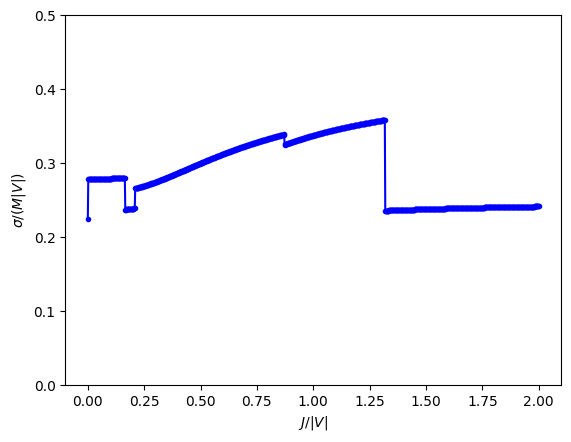

In [28]:
fig, ax = plt.subplots()
ax.plot(J_V_ratios, normalized_sigmas, ".b")
ax.plot(J_V_ratios, normalized_sigmas, "-b")
ax.set_xlabel("$J/|V|$")
ax.set_ylabel("$\sigma/(M|V|)$")
ax.set_ylim(0,0.5)